In [1]:
import numpy as np
import matplotlib.pyplot as plt

#initialise variables
tMax = 650

# Load the CSV file
time_series_data = np.loadtxt("arma_time_series_Final.csv", delimiter=",")

print(time_series_data)
print(time_series_data.shape)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.19244566e-01
  5.83979360e-01  1.22020015e-01  1.09936119e-01  2.21892070e-01
 -1.76933084e-01 -3.08416480e-01 -5.65313590e-01 -8.12899023e-01
 -7.36498938e-01 -1.17073545e+00 -1.63752544e+00 -8.58401524e-01
 -1.02950962e+00 -9.74301199e-01 -8.82989999e-01 -1.03810027e+00
 -1.15936351e+00 -6.20735822e-01 -1.90358141e-01 -5.80448482e-01
 -3.36023929e-01 -1.04134839e+00 -1.86844930e+00 -2.21408396e+00
 -2.76332697e+00 -3.48865149e+00 -2.72735226e+00 -1.83137267e+00
 -1.64514504e+00 -1.98970582e+00 -1.55191830e+00 -1.47980634e+00
 -1.82642919e+00 -1.59539050e+00 -2.36049074e-01  4.36539251e-01
  3.70670276e-01  2.60586710e-01  6.39360847e-01  5.37024377e-01
  5.61149654e-01  7.48019858e-01  9.15942940e-01  1.62178189e+00
  2.57492341e+00  2.74002514e+00  2.98443578e+00  3.29010569e+00
  3.18008118e+00  2.25994902e+00  8.91572976e-01 -1.26897267e-01
  2.65424542e-01  2.08031686e-01  3.77485614e-01 -8.64822656e-02
 -7.85969897e-01 -3.16712

In [2]:
#Reshape array for normalisation and to create model-fit
xArray = np.array(time_series_data)
x1 = xArray.reshape(600,1)
print(x1.shape)
len(x1)

(600, 1)


600

In [3]:
#Assigning 500 values of matrix x1 to numsArray
numsArray = x1[99:(tMax-51)]

#printing shape to see if the desired matrix has been achieved
print("The shape of numsArray:",numsArray.shape, "\n")

#copying values to normArray
normArray = numsArray

# finding the minimum value of normArray
ymin = np.min(normArray)
print("Minimum value:",ymin,"\n")

# finding the maximum value of normArray
ymax = np.max(normArray) 
print("Maximum value:",ymax,"\n")


#Normalisation using min-max
numsArray = 2.0*((normArray-ymin)/(ymax-ymin)-0.5)
b = max(numsArray)
print("b:\n",b)
#GENERATING LAGS

#transforming the matrix to generate lags in the dataset
lagArray = numsArray.reshape(-1,1)

#input dimension/window size for which-- 
#--one-step ahead prediction needs to be done on dataset
inputDim = 10

#output dimension
outputDim = len(lagArray) - inputDim 
#print("The value of outputDim:",outputDim,"\n")

#intitialising x1 matrix to zeros
x1 = np.zeros((outputDim,inputDim))

#intitialising y1 to zero
y1 = np.zeros(outputDim)

#for-loop to find x1 and y1 values according to input dimension
#to enable one step ahead prediction
for i in range(1, outputDim):
    
    y1[i] = lagArray[i + inputDim]
        
    for j in range(0,inputDim):
        x1[i, j] = lagArray[i-j+inputDim]
    #print(round(y1[i],5))
    
#Choosing the x1 and y1 values that fit perfectly
y1 = y1[2:(outputDim)]
x1 = x1[1:(outputDim-1)]

print("The length of the array x1:",x1.shape,"\n")
print("Length of the array y1:",y1.shape,"\n")

The shape of numsArray: (500, 1) 

Minimum value: -3.4027688567187244 

Maximum value: 3.9018287617942895 

b:
 [1.]
The length of the array x1: (488, 10) 

Length of the array y1: (488,) 



In [4]:
#SPLIT THE DATA INTO TRAIN AND TEST DATA

# print the length of array x1
print("Print the length of x1:", len(x1))

#TRAINING DATA
# initialize arrays x and y
x = x1[0:(outputDim-100), 0:10]
y = y1[0:(outputDim-100)]

# print the shape of array y
print("Print the shape of y:", y.shape)

#TEST DATA
# initialize array t
t = x1[391:(outputDim-2), 0:10]

# initialize array test-set
y_test = y1[(outputDim-99):outputDim]

# print the length of arrays x and t
print("The length of x:", len(x), "\nThe length of t:", len(t))

# transpose the array x to create the array newArray
newArray = np.transpose(x)

# print the shape of newArray and arrays x and y
print("The shape of newArray:", newArray.shape)
print("\nThe shape of x:", x.shape)
print("\nThe shape of y:", y.shape)

#assign y values to variable targets
targets = y

#print the shape of newArray
print('targets shape:', targets.shape)

#initialize variables NHIDDENS and outputVal
NHID = 5
outputVal = targets

#initialize variables NINPUTS and NPATS
NINP, NPATS = newArray.shape

#print the values of variables NINPUTS and NPATS
print("Value of NINPUTS:", NINP, "\nValue of NPATS:", NPATS)

#initialize variables NP and NOUTPUTS
NP = targets.shape[0]
NOUTPUTS = targets.shape[0]/NP

#print the values of variables NP and NOUTPUTS
print("Value of NP:", NP, "\nValue of NOUTPUTS:", NOUTPUTS)


Print the length of x1: 488
Print the shape of y: (390,)
The length of x: 390 
The length of t: 97
The shape of newArray: (10, 390)

The shape of x: (390, 10)

The shape of y: (390,)
targets shape: (390,)
Value of NINPUTS: 10 
Value of NPATS: 390
Value of NP: 390 
Value of NOUTPUTS: 1.0


The shape of input matrix: (11, 390)
Test Run 0: Epoch 0: Error = 30.275980013462323
Test Run 0: Epoch 1: Error = 30.15299506638999
Test Run 0: Epoch 2: Error = 30.03028329516763
Test Run 0: Epoch 3: Error = 29.907795396854524
Test Run 0: Epoch 4: Error = 29.785494150937115
Test Run 0: Epoch 5: Error = 29.6633519585754
Test Run 0: Epoch 6: Error = 29.541348788015917
Test Run 0: Epoch 7: Error = 29.419470540461457
Test Run 0: Epoch 8: Error = 29.29770775342272
Test Run 0: Epoch 9: Error = 29.176054574520577
Test Run 0: Epoch 10: Error = 29.05450795165438
Test Run 0: Epoch 11: Error = 28.93306699595324
Test Run 0: Epoch 12: Error = 28.81173248243494
Test Run 0: Epoch 13: Error = 28.69050646018282
Test Run 0: Epoch 14: Error = 28.569391949416932
Test Run 0: Epoch 15: Error = 28.448392707329745
Test Run 0: Epoch 16: Error = 28.32751304818133
Test Run 0: Epoch 17: Error = 28.206757706068114
Test Run 0: Epoch 18: Error = 28.086131731128344
Test Run 0: Epoch 19: Error = 27.965640411834293
Tes

Test Run 0: Epoch 183: Error = 13.865265287777165
Test Run 0: Epoch 184: Error = 13.81937946111924
Test Run 0: Epoch 185: Error = 13.773844152102651
Test Run 0: Epoch 186: Error = 13.728656795951538
Test Run 0: Epoch 187: Error = 13.683814889011952
Test Run 0: Epoch 188: Error = 13.639315987663247
Test Run 0: Epoch 189: Error = 13.595157707151003
Test Run 0: Epoch 190: Error = 13.55133772034643
Test Run 0: Epoch 191: Error = 13.507853756437076
Test Run 0: Epoch 192: Error = 13.464703599553708
Test Run 0: Epoch 193: Error = 13.421885087338179
Test Run 0: Epoch 194: Error = 13.379396109456978
Test Run 0: Epoch 195: Error = 13.337234606065174
Test Run 0: Epoch 196: Error = 13.295398566225332
Test Run 0: Epoch 197: Error = 13.25388602628596
Test Run 0: Epoch 198: Error = 13.212695068223892
Test Run 0: Epoch 199: Error = 13.171823817954989
Test Run 0: Epoch 200: Error = 13.1312704436174
Test Run 0: Epoch 201: Error = 13.091033153831575
Test Run 0: Epoch 202: Error = 13.051110195941039
Test 

Test Run 0: Epoch 476: Error = 8.593373547005783
Test Run 0: Epoch 477: Error = 8.586160723431917
Test Run 0: Epoch 478: Error = 8.578970783205591
Test Run 0: Epoch 479: Error = 8.571803683379603
Test Run 0: Epoch 480: Error = 8.564659382329964
Test Run 0: Epoch 481: Error = 8.557537839734065
Test Run 0: Epoch 482: Error = 8.550439016549257
Test Run 0: Epoch 483: Error = 8.543362874991768
Test Run 0: Epoch 484: Error = 8.536309378515906
Test Run 0: Epoch 485: Error = 8.529278491793592
Test Run 0: Epoch 486: Error = 8.522270180694113
Test Run 0: Epoch 487: Error = 8.51528441226414
Test Run 0: Epoch 488: Error = 8.508321154707918
Test Run 0: Epoch 489: Error = 8.501380377367663
Test Run 0: Epoch 490: Error = 8.494462050704117
Test Run 0: Epoch 491: Error = 8.48756614627722
Test Run 0: Epoch 492: Error = 8.480692636726923
Test Run 0: Epoch 493: Error = 8.473841495754087
Test Run 0: Epoch 494: Error = 8.467012698101467
Test Run 0: Epoch 495: Error = 8.460206219534758
Test Run 0: Epoch 496:

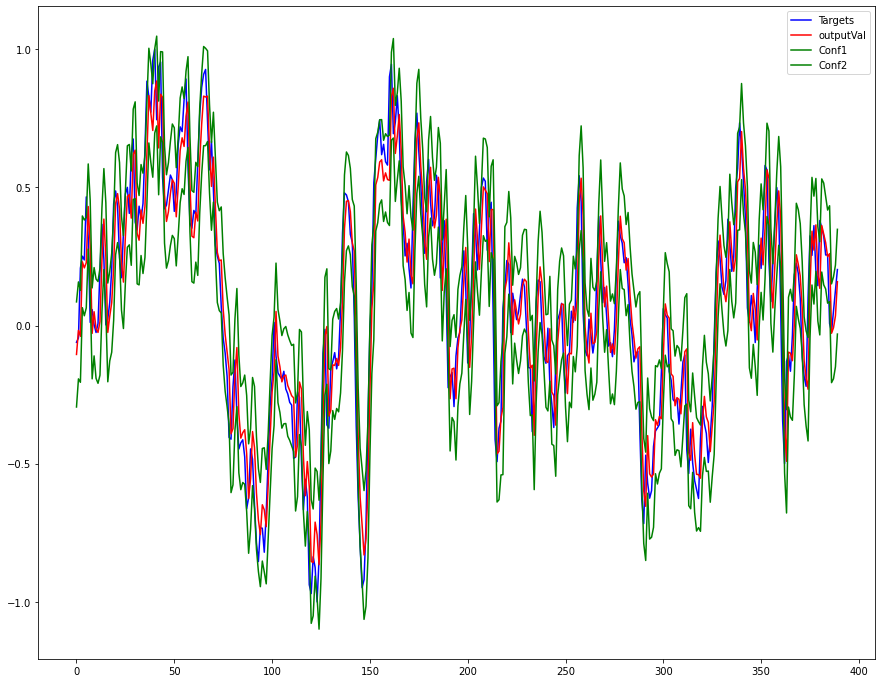

In [8]:
eta = 0.0001
etas = 0.00001
#target error
L = 0.02

# initialize the best SSE
best_sse = np.inf

inputs = np.concatenate((newArray, np.ones((1, NPATS))), axis=0)
print("The shape of input matrix:", inputs.shape)


sig = np.ones((1, NP))


for i in range (0,1):
    np.random.seed(1)
    
    #Weights for the mean network
    w1 = 0.5 * (np.random.rand(NHID, NINP+1) - 0.5)
    w2 = 0.5 * (np.random.rand(1, NHID+1) - 0.5)
    
    #Weights for the variance network
    w1s = 0.5 * (np.random.rand(NHID, NINP+1) - 0.5)
    w2s = 0.5 * (np.random.rand(1, NHID+1) - 0.5)
    
    
    for epoch in range(0,200):
        
        #Forward propagation:
        sum1 = np.matmul(w1, inputs)
        
        #finding hidden node value by calculating tanh of the output form hidden node
        hidden = np.tanh(sum1)    
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2 = np.dot(w2, np.concatenate((hidden, np.ones((1, NPATS))), axis=0))
        
        out = sum2 
        #outputVal = out
        
        #Backpropagation of errors of the mean network
        error = targets - out 
        
        #sum squared error
        sse = np.sum(error**2) 
        
        #error at ouput
        bout = np.divide(error,sig)
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bp = np.dot(w2.T, bout) 
        
        #computing the error at the hidden layer
        bh = np.multiply((1.0 - np.power(hidden, 2)), bp[:-1, :])
        
        # Computing the change in weights:
        dW2 = np.dot(bout, np.concatenate((hidden, np.ones((1, NPATS))), axis=0).T)
        dW1 = np.dot(bh, inputs.T)
            
        # Updating the weights:
        w2 = w2 + eta*dW2
        w1 = w1 + eta*dW1
        
            
    for epoch in range(0,200):
        
        #Forward propagation:
        sum1s = np.matmul(w1s, inputs) 
        
        #calculating output from hidden node by taking tanh of the output
        hiddens = np.tanh(sum1s)  
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2s = np.dot(w2s, np.concatenate((hiddens, np.ones((1, NPATS))), axis=0))
        
        #assigning to sig the exponential of the output 
        sig = np.exp(sum2s)
              
        #Backpropagation of errors for variance network:
        error_product = np.multiply(error, error)
        error_division = np.divide(error_product, sig)
        bouts = np.divide(error_division - 1.0, 2)
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bps = np.dot(w2s.T, bouts) 
        
        #computing the error at the hidden layer
        bhs = np.multiply((1.0 - np.power(hiddens, 2)), bps[:-1, :])
        
        # Computing the change in weights:
        dW2s = np.dot(bouts, np.concatenate((hiddens, np.ones((1, NPATS))), axis=0).T)
        dW1s = np.dot(bhs, inputs.T)
            
        # Updating the weights:
        w2s = w2s + etas*dW2s
        w1s = w1s + etas*dW1s
        
        
        
    for epoch in range(0,500):  
        
        #Forward propagation:
        sum1 = np.matmul(w1, inputs)
        
        #finding hidden node value by calculating tanh of the output
        hidden = np.tanh(sum1)    
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2 = np.dot(w2, np.concatenate((hidden, np.ones((1, NPATS))), axis=0))
        
        out = sum2 
        #outputVal = out
        
        
        #Backpropagation of errors:
        error = targets - out 
        sse = np.sum(error**2) 
        
        #find best sse value to get the best weights
        if sse < best_sse:
            best_sse = sse
            best_weights_mean = (w1, w2)
        
                           
        #error at ouput
        bout = np.divide(error,sig)
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bp = np.dot(w2.T, bout) 
        
        #computing the error at the hidden layer
        bh = np.multiply((1.0 - np.power(hidden, 2)), bp[:-1, :])
        
        # Computing the change in weights:
        dW2 = np.dot(bout, np.concatenate((hidden, np.ones((1, NPATS))), axis=0).T)
        dW1 = np.dot(bh, inputs.T)
        
        # Updating the weights:
        w2 = w2 + eta*dW2
        w1 = w1 + eta*dW1
        
        
        #variance network
        
        sum1s = np.matmul(w1s, inputs) 
        hiddens = np.tanh(sum1s)   
        
        #calculating dot product and output node
        #adding a bias term to the hidden node using concatenate before using dot product
        sum2s = np.dot(w2s, np.concatenate((hiddens, np.ones((1, NPATS))), axis=0))
        
        #assigning to sig the exponential of the output
        sig = np.exp(sum2s)
        
        #assigning value of sig to outs
        outs = sig     
        
        #Backpropagation of errors for variance network:
        error_product = np.multiply(error, error)
        error_division = np.divide(error_product, sig)
        bouts = np.divide(error_division - 1.0, 2)
        
        #calcualting the error propogated back
        #from the output layer to the hidden layer
        bps = np.dot(w2s.T, bouts) 
        
        #computing the error at the hidden layer
        bhs = np.multiply((1.0 - np.power(hiddens, 2)), bps[:-1, :])
        
        # Computing the change in weights:
        dW2s = np.dot(bouts, np.concatenate((hiddens, np.ones((1, NPATS))), axis=0).T)
        dW1s = np.dot(bhs, inputs.T)
            
        # Updating the weights:
        w2s = w2s + etas*dW2s
        w1s = w1s + etas*dW1s
        
            
          
                        
    # print the SSE for this test run
        print(f'Test Run {i}: Epoch {epoch}: Error = {sse}')
    

#Best SSE from all test runs    
print(f'Best SSE = {best_sse}')

print("Best Weights Mean Network w1:\n",w1,"\nBest Weights Mean Network w2:\n",w2)
print("Best Weights Variance Network w1s:\n",w1s,"\nBest Weights Variance Network w2s:\n",w2s)


#Assuming 'targets', 'out', and 'outs' variables are NumPy arrays
#Flatten to 1D array to enable plotting
outputVal = out.ravel()
conf1 = outputVal + 1.645 * outs
conf1 = conf1.ravel()
conf2 = outputVal - 1.645 * outs
conf2 = conf2.ravel()

print("Targets shape:", targets.shape)
print("\noutputVal shape:", outputVal.shape)
print("\nConf1 shape:", conf1.shape)
print("\nConf2 shape:", conf2.shape)

#setting a range to plot
x_range = np.arange(0, 390)
print(targets.shape)

#plotting
plt.figure(figsize=(15, 12))
plt.plot(range(len(targets.T)), targets, 'b', label='Targets')
plt.plot(range(len(outputVal)), outputVal, 'r', label='outputVal')
plt.plot(x_range, conf1, 'g', label='Conf1')
plt.plot(x_range, conf2, 'g', label='Conf2')

plt.legend()
plt.show()


(11, 97)
(5, 97)
(1, 97)
Shape of outputVal_mean: (1, 97)
Shape of predictions mean: (97,)
(5, 97)
(1, 97)
Length 1
Shape of outputVal_variance: (1, 97)
Shape of predictions variance: (97,)
length 97


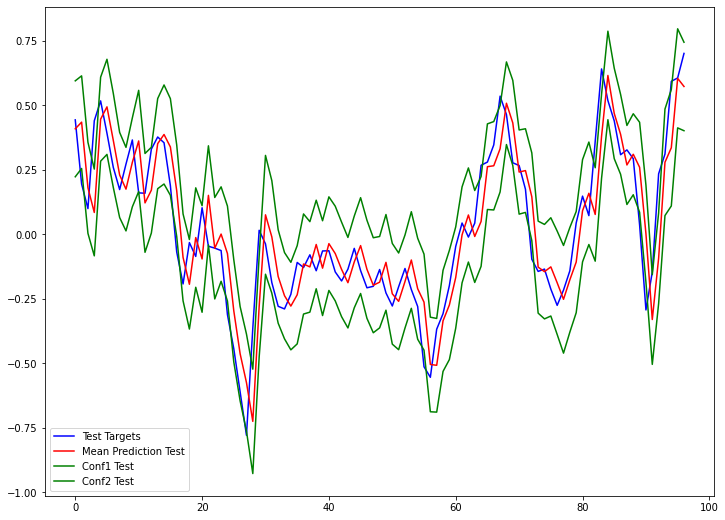

In [9]:
#Forecast the data

#mean network
#forward propogation
testinputs = np.concatenate((t.T, np.ones((1, t.shape[0]))), axis=0)
print(testinputs.shape)
sum1_m = np.matmul(w1, testinputs) 
print(sum1_m.shape)
hidden_m = np.tanh(sum1_m)
sum2_m = np.dot(w2, np.concatenate((hidden_m, np.ones((1, t.shape[0]))), axis=0))
print(sum2_m.shape)
out_m = sum2_m 
outputVal_mean = out_m 
print("Shape of outputVal_mean:",outputVal_mean.shape)

#Flatten outputVal dataset to 1DArray to visualize the data
predictions_m = outputVal_mean.ravel()
print("Shape of predictions mean:",predictions_m.shape)


#variance network
sum1_v = np.matmul(w1s, testinputs) 
print(sum1_v.shape)
hidden_v = np.tanh(sum1_v)
sum2_v = np.dot(w2s, np.concatenate((hidden_v, np.ones((1, t.shape[0]))), axis=0))
print(sum2_v.shape)
out_v = np.exp(sum2_v) 
outputVal_variance = out_v 
print("Length",len(outputVal_variance))
print("Shape of outputVal_variance:",outputVal_variance.shape)

#confidence interval 1
conf1_test = predictions_m + 1.645 * outputVal_variance
conf1_test = conf1_test.ravel()

#confidence interval 2
conf2_test = predictions_m - 1.645 * outputVal_variance
conf2_test = conf2_test.ravel()

plt.figure(figsize=(12, 9))
plt.plot(range(len(y_test)), y_test, 'b', label='Test Targets')
plt.plot(range(len(predictions_m)), predictions_m, 'r', label='Mean Prediction Test')
plt.plot(range(len(conf1_test)), conf1_test, 'g', label='Conf1 Test')
plt.plot(range(len(conf2_test)), conf2_test, 'g', label='Conf2 Test')
#Flatten outputVal dataset to 1DArray to visualize the data
predictions_v = outputVal_variance.ravel()
print("Shape of predictions variance:",predictions_v.shape)
print("length",len(predictions_v))

plt.legend()
plt.show()